In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_excel("gambung_tea.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14040 entries, 0 to 14039
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   14040 non-null  int64  
 1   MQ3          14040 non-null  int64  
 2   TGS822       14040 non-null  int64  
 3   TGS2602      14040 non-null  int64  
 4   MQ5          14040 non-null  int64  
 5   MQ138        14040 non-null  int64  
 6   TGS2620      14040 non-null  int64  
 7   Score        14040 non-null  float64
 8   Class        14040 non-null  object 
 9   Sampling_id  14040 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 1.1+ MB


In [3]:
# Extract input variables and target labels
X = data.iloc[:, 1:7].values
y = data.iloc[:, 7].values
print(X, y)

[[855 304 299 417 810 349]
 [856 305 299 416 811 349]
 [856 305 298 416 810 349]
 ...
 [797 274 282 397 866 300]
 [794 266 279 405 871 302]
 [797 267 276 407 870 301]] [43.4 43.4 43.4 ... 45.5 45.5 45.5]


In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Test the model
y_pred_rf = rf_model.predict(X_test)

In [6]:
# Calculate the accuracy scores
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE (Random Forest):", mse_rf)
print("R2 Score (Random Forest):", r2_rf)

MSE (Random Forest): 0.4770753925930161
R2 Score (Random Forest): 0.9553543579236599


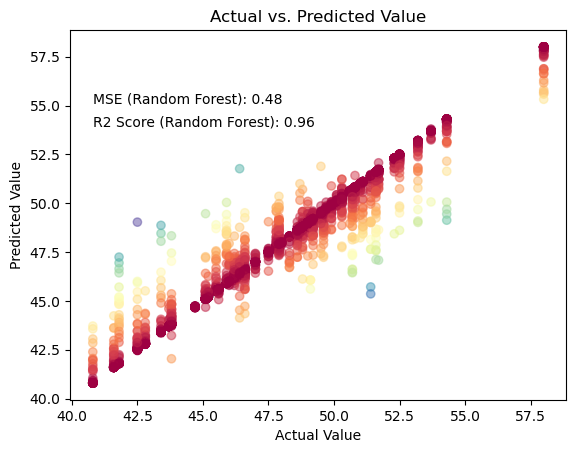

In [15]:
# Calculate the errors (Absolute Difference)
errors = abs(y_test - y_pred_rf)

# Create and show the scatter plot
plt.scatter(y_test, y_pred_rf, alpha=0.5, c=errors, cmap='Spectral')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.title("Actual vs. Predicted Value")

# Annotate MSE and R2 values on the plot
plt.text(min(y_test), max(y_pred_rf) * 0.93, f"R2 Score (Random Forest): {r2_rf:.2f}")
plt.text(min(y_test), max(y_pred_rf) * 0.95, f"MSE (Random Forest): {mse_rf:.2f}")

plt.show()